**Trabalhando com dados de vendas**

In [2]:
import pandas as pd


In [3]:
#leitura de arquivos
df1 = pd.read_excel("/content/drive/MyDrive/ETL/ColabEstudo/datasets/Aracaju.xlsx")
df2 = pd.read_excel("/content/drive/MyDrive/ETL/ColabEstudo/datasets/Fortaleza.xlsx")
df3 = pd.read_excel("/content/drive/MyDrive/ETL/ColabEstudo/datasets/Natal.xlsx")
df4 = pd.read_excel("/content/drive/MyDrive/ETL/ColabEstudo/datasets/Recife.xlsx")
df5 = pd.read_excel("/content/drive/MyDrive/ETL/ColabEstudo/datasets/Salvador.xlsx")

In [4]:
#Juntando todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,NaN,1521,7
4,Aracaju,2018-01-01,NaN,1522,8


In [5]:
#últimas linhas
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [6]:
df.count()

Cidade    894
Data      894
Vendas    892
LojaID    894
Qtde      894
dtype: int64

In [7]:
#Pega 5 aleatoriamente
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
13,Aracaju,2018-01-01,43.45,1522,10
54,Recife,2019-01-01,23.43,982,7
130,Salvador,2019-03-02,59.78,1036,1
168,Salvador,2019-01-02,20.22,1036,1
215,Natal,2019-01-02,203.84,1036,1


In [8]:
#Alterando tipos de dados
df["LojaID"] = df["LojaID"].astype("object")

In [9]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [10]:
#Linhas com valores nulos
df.isnull().sum()

Cidade    0
Data      0
Vendas    2
LojaID    0
Qtde      0
dtype: int64

In [11]:
#Subistituir valor nulos pela Média
#inplace - Seja modificado em memória
#Subistituindo nulos por 0 = df["Vendas"].fillna(0, inplace=True)
#Removendo linha nulas = df.dropna(inplace=True)
#Removendo linhas com base somente a colunas vendas = df.dropna(subset=["Vendas"], inplace=True)
#Removendo somente linhas que tem valos nulos das colunas = df.dropna(how="all", inplace=True)
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)


In [12]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

**Criando novas colunas**


In [13]:
#Criando nova coluna multiplicando quantidade por valor da venda
df["Receita"] = df["Vendas"].mul(df["Qtde"])
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.000000,1520,1,142.000000
1,Aracaju,2018-01-01,14.210000,1522,6,85.260000
2,Aracaju,2018-01-01,71.550000,1520,1,71.550000
3,Aracaju,2018-01-01,122.855863,1521,7,859.991043
4,Aracaju,2018-01-01,122.855863,1522,8,982.846906


In [14]:
df["Receita"].max()

3544.0

In [15]:
#Retorna linhas ordenando decrescente os valores da receita
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [16]:
#Retorna linhas em ordem crescente os valores da receita
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [17]:
#Agrupar por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       50373.937948
Fortaleza     37913.970000
Natal        167227.520000
Recife        51936.510000
Salvador      40596.730000
Name: Receita, dtype: float64

In [18]:
#Ordenando os valores
df.sort_values("Receita", ascending=True).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Salvador,2019-01-01,4.57,1035,1,4.57
92,Natal,2019-01-02,4.57,1035,1,4.57
95,Salvador,2019-01-01,5.13,1035,1,5.13
95,Natal,2019-01-02,5.13,1035,1,5.13
161,Salvador,2019-01-02,5.80,1036,1,5.80
161,Natal,2019-01-02,5.80,1036,1,5.80
216,Natal,2019-01-02,5.82,1035,1,5.82
216,Salvador,2019-01-02,5.82,1035,1,5.82


**Trabalhando com DATAS**

In [19]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [20]:
#Agrupando por data por ano
#dt - datetime
#dt.year - vai na minha data e extrai apenas o ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    119802.217948
2019    228246.450000
Name: Receita, dtype: float64

In [21]:
#Criando coluna Ano_venda
df["Ano_Venda"] = df["Data"].dt.year


In [22]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
1,Natal,2018-11-25,563.00,853,2,1126.00,2018
203,Natal,2019-01-02,37.75,1035,2,75.50,2019
62,Natal,2018-02-10,793.00,854,4,3172.00,2018
36,Recife,2019-01-01,146.62,983,6,879.72,2019
21,Natal,2019-02-08,679.00,853,2,1358.00,2019


In [23]:
#Extraíndo mês e o dia
df["Mes_Venda"], df["Dia_Venda"] = (df["Data"].dt.month, df["Data"].dt.day)


In [24]:

df.sample()


,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda
128,Aracaju,2018-01-01,37.49,1521,2,74.98,2018,1,1


In [25]:
#Data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [26]:
#Calculando diferença de dias entre datas proximas menos anterior
df["Diferenca_Dias"] = df["Data"] - df["Data"].min()

In [27]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dias
27,Natal,2018-07-16,390.00,853,3,1170.00,2018,7,16,196 days
41,Aracaju,2018-01-01,229.64,1520,8,1837.12,2018,1,1,0 days
215,Natal,2019-01-02,203.84,1036,1,203.84,2019,1,2,366 days
15,Aracaju,2018-01-01,153.28,1523,6,919.68,2018,1,1,0 days
110,Fortaleza,2019-03-02,51.98,983,6,311.88,2019,3,2,425 days


In [28]:
#trimestre venda
df["Trimestre_Venda"] = df["Data"].dt.quarter

In [29]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dias,Trimestre_Venda
57,Fortaleza,2019-01-01,129.07,1005,3,387.21,2019,1,1,365 days,1
138,Fortaleza,2019-03-02,150.38,983,6,902.28,2019,3,2,425 days,1
101,Natal,2019-01-02,32.28,1035,3,96.84,2019,1,2,366 days,1
14,Natal,2018-06-03,660.00,853,3,1980.00,2018,6,3,153 days,2
71,Recife,2019-01-01,138.69,983,3,416.07,2019,1,1,365 days,1


In [30]:
#filtrando as vendas de 2019 do mês 4
venda_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 4)]

venda_marco_19.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dias,Trimestre_Venda
81,Natal,2019-04-02,564.0,854,2,1128.0,2019,4,2,456 days,2
49,Natal,2019-04-01,831.0,852,2,1662.0,2019,4,1,455 days,2
65,Natal,2019-04-05,292.0,852,2,584.0,2019,4,5,459 days,2
43,Natal,2019-04-01,538.0,853,3,1614.0,2019,4,1,455 days,2
77,Natal,2019-04-01,426.0,853,3,1278.0,2019,4,1,455 days,2


**Visualização de dados**

In [31]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1002     30
1005     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

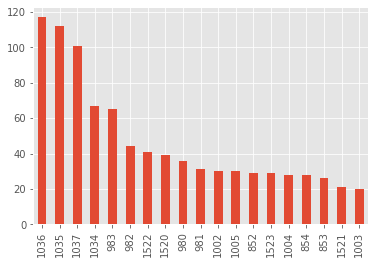

In [46]:
#Gráfico de barras vertical
df["LojaID"].value_counts(ascending=False).plot.bar();

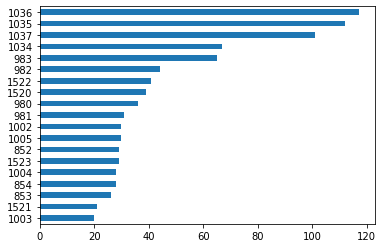

In [32]:
#Gráfico de barras horizontal
df["LojaID"].value_counts(ascending=True).plot.barh();

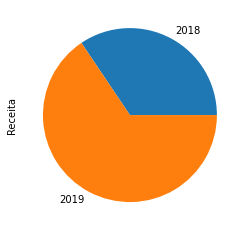

In [33]:
#Gráfico pizza receita por ano
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();


In [34]:
#Total de vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

Text(0, 0.5, 'Total Vendas')

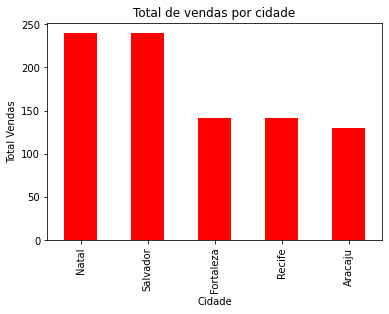

In [35]:
# Gráfico
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas")

In [36]:
#Alterando estilo gráfico
plt.style.use("ggplot")

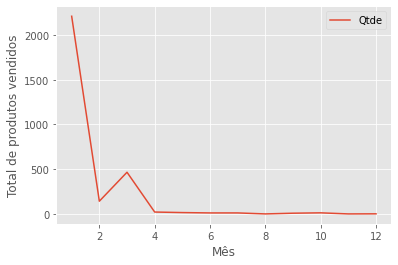

In [37]:
# Agrupamento de mês de venda, somando a quantidade de produtos vendidos
#total de produtos vendidos por mês
df.groupby(df["Mes_Venda"])["Qtde"].sum().plot();
plt.xlabel("Mês")
plt.ylabel("Total de produtos vendidos")
plt.legend()

In [38]:
df.groupby(df["Mes_Venda"])["Qtde"].sum()

Mes_Venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [39]:
df_2019 = df[df["Ano_Venda"] == 2019]


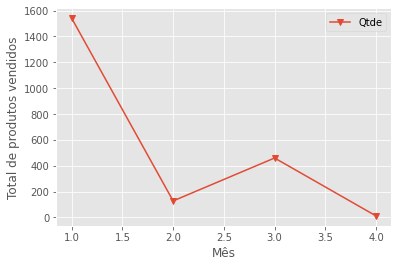

In [40]:
#total produtos vendidos por mês
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum().plot(marker='v')
plt.xlabel("Mês")
plt.ylabel("Total de produtos vendidos")
plt.legend();

In [42]:
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum()

Mes_Venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

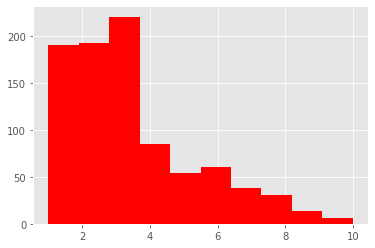

In [43]:
#histograma quantidade produtos vendidos
plt.hist(df["Qtde"], color="red");

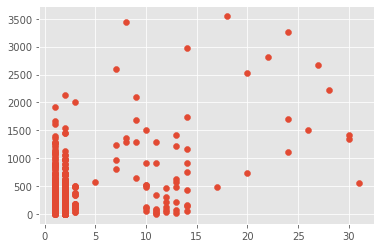

In [44]:
#Gráfico de disperção
plt.scatter(x=df_2019["Dia_Venda"], y = df_2019["Receita"]);

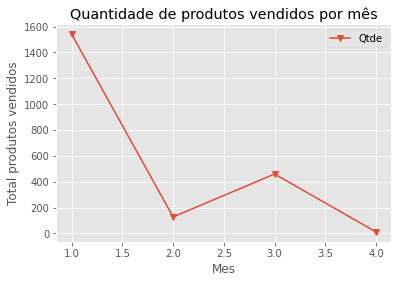

In [45]:
#Salvando imagem
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum().plot(marker = "v")
plt.title("Quantidade de produtos vendidos por mês")
plt.xlabel("Mes")
plt.ylabel("Total produtos vendidos")
plt.legend()
plt.savefig("graficosQTDExMes.png")